In [1]:
from preprocess import *
import matplotlib.pyplot as plt
from c_models import *

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

download the file from https://figshare.com/collections/A_large_electroencephalographic_motor_imagery_dataset_for_electroencephalographic_brain_computer_interfaces/3917698

# Input

In [3]:
file_name = "CLA-SubjectJ-170510-3St-LRHand-Inter"

In [4]:
f1 = "rawData/" + file_name + ".mat"
mat = take_input(f1)
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Apr 23 22:31:58 2018',
 '__version__': '1.0',
 '__globals__': [],
 'ans': array([[23.71073254]]),
 'o': array([[(array(['201705101500.32BEA9DD'], dtype='<U21'), array([], dtype='<U1'), array([[621884]], dtype=int32), array([[200]], dtype=uint8), array([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], dtype=uint8), array([[ 0],
        [ 0],
        [ 0],
        ...,
        [92],
        [92],
        [92]], dtype=uint8), array([[ 13.2,   6.6,  -1.2, ...,  -0.6,   4.8,  -0. ],
        [-21.6,  -5.4,   2.4, ..., -12. ,  -9.6,  -0. ],
        [-13.2,   8.4,   0.6, ...,  -3.6,  -0.6,  -0. ],
        ...,
        [-39.6, -10.8,  -5.4, ...,  -3.6,   4.2,  -0. ],
        [-40.2, -14.4,  -3.6, ...,  -1.2,   2.4,  -0. ],
        [-24.6,  -6.6, -12. , ...,  -0. ,   1.2,  -0. ]]), array([[array(['Fp1'], dtype='<U3')],
        [array(['Fp2'], dtype='<U3')],
        [array(['F3'], dtype='<U

In [5]:
mat['o'][0][0].dtype

dtype([('id', 'O'), ('tag', 'O'), ('nS', 'O'), ('sampFreq', 'O'), ('marker', 'O'), ('marker_old', 'O'), ('data', 'O'), ('chnames', 'O'), ('binsuV', 'O')])

In [6]:
idx = 4
markers = get_markers(mat, idx) 

In [7]:
idx = 6
data = get_data(mat, idx)

In [8]:
frame_of_1 = get_trial_frames(data, markers, 1)
frame_of_2 = get_trial_frames(data, markers, 2)
frame_of_3 = get_trial_frames(data, markers, 3)


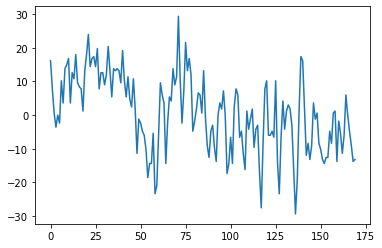

In [9]:
plt.plot(np.arange(170),frame_of_1[0][0])

In [10]:
low_pass_filter = design_filter(8, 200, 5)

In [11]:
f_signal_1 = apply_filter(low_pass_filter, frame_of_1)
f_signal_2 = apply_filter(low_pass_filter, frame_of_2)
f_signal_3 = apply_filter(low_pass_filter, frame_of_3)

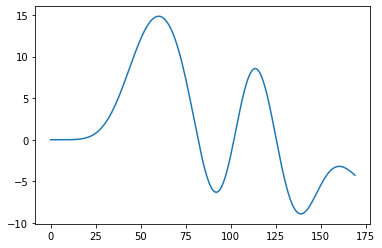

In [12]:
plt.plot(np.arange(170),f_signal_1[0][0])

In [13]:
transformed_frame_of_1 = fourier_trans(f_signal_1)
transformed_frame_of_2 = fourier_trans(f_signal_2)
transformed_frame_of_3 = fourier_trans(f_signal_3)

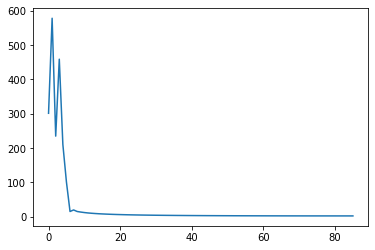

In [14]:
plt.plot(abs(transformed_frame_of_1[0][0]))

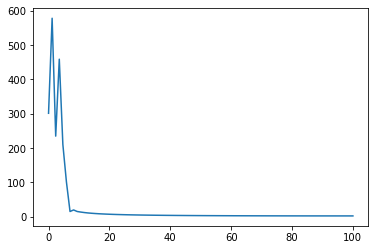

In [15]:
yf = transformed_frame_of_1[0][0]
v = np.arange(86)
t = 170/200.0
xf = v/t

fig, ax = plt.subplots()
ax.plot(xf, abs(yf))
plt.show()


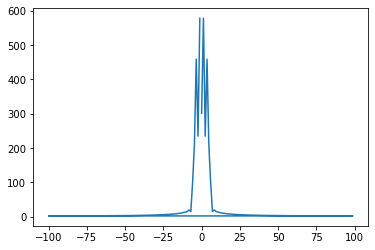

In [16]:
yf = fft.fft(f_signal_1, axis=2)
yf = yf[0][0]
xf = fft.fftfreq(170, 1/200.0)
fig, ax = plt.subplots()
ax.plot(xf, np.abs(yf))
plt.show()

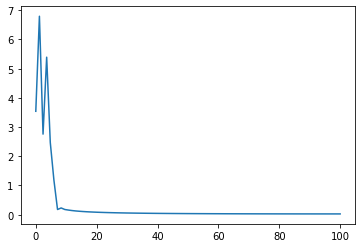

In [17]:
yf = fft.fft(f_signal_1, axis=2)
yf = yf[0][0]
xf = np.linspace(0.0, 1.0/(2.0*(1.0/200.0)), 85)
                 
fig, ax = plt.subplots()
ax.plot(xf, (2.0/170) * np.abs(yf[0:85]))
plt.show()

In [18]:
transformed_frame_of_1 = remove_phase_shift(transformed_frame_of_1)
transformed_frame_of_2 = remove_phase_shift(transformed_frame_of_2)
transformed_frame_of_3 = remove_phase_shift(transformed_frame_of_3)

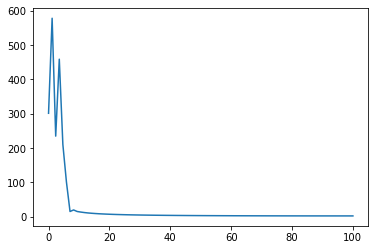

In [19]:
yf = transformed_frame_of_1[0][0]
xf = fft.rfftfreq(170, 1/200.0)
fig, ax = plt.subplots()
ax.plot(xf, np.abs(yf))
plt.show()

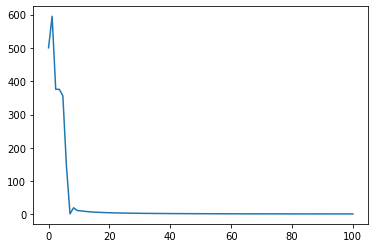

In [20]:
yf = transformed_frame_of_2[0][0]
xf = fft.rfftfreq(170, 1/200.0)
fig, ax = plt.subplots()
ax.plot(xf, np.abs(yf))
plt.show()

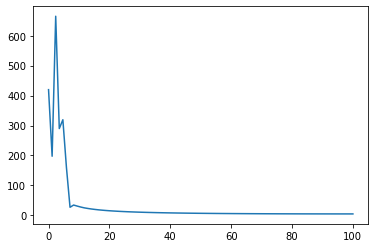

In [21]:
yf = transformed_frame_of_3[0][0]
xf = fft.rfftfreq(170, 1/200.0)
fig, ax = plt.subplots()
ax.plot(xf, np.abs(yf))
plt.show()

In [22]:
all_trials_of_1 = extract_features(transformed_frame_of_1)
all_trials_of_2 = extract_features(transformed_frame_of_2)
all_trials_of_3 = extract_features(transformed_frame_of_3)

In [23]:
print(all_trials_of_1.shape)
print(all_trials_of_2.shape)
print(all_trials_of_3.shape)

(289, 189)
(327, 189)
(284, 189)


In [24]:
trials_sets = [all_trials_of_1, all_trials_of_2, all_trials_of_3]
class_labels = [1, 2, 3]
dataset = create_dataset(trials_sets, class_labels)

In [25]:
dataset

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,label
0,3.009208e+02,-3.429649e+02,-4.647622e+02,-2.246806e+02,6.696642e+01,4.447605e+02,-1.110354e+02,-1.349488e+02,1.608583e+02,2.724722e+02,...,1.448769e+02,-6.538818e+01,6.694365e+01,-1.105842e+02,-4.063089e+01,2.597227e+01,-7.757350e+01,5.763786e+01,-3.373140e+01,1
1,8.153356e+01,-2.487301e+02,-3.439767e+02,4.348247e-70,-1.549788e-71,3.002417e-09,5.969172e-10,-8.524113e-09,2.774222e-08,-3.028136e-77,...,2.133608e+02,-5.294351e-11,1.579116e-11,-3.877128e-19,-9.025796e-19,-7.986507e-98,3.732105e-98,1.717720e-16,-4.723078e-16,1
2,-6.844169e-77,-1.602293e-05,-4.474336e-05,9.900584e-54,7.165481e-54,1.620427e-29,2.498059e-29,-1.309452e-118,-8.702618e-119,5.592183e+01,...,1.366472e+02,1.415349e-24,5.354570e-24,-5.195356e-01,-2.534969e-01,-1.472199e-97,6.984946e-98,2.136611e-01,-1.549255e-01,1
3,-4.542022e-76,6.922251e-24,-1.779245e-23,2.150871e-75,-5.714650e-76,7.055221e-37,2.307332e-36,-3.934227e-15,5.671445e-14,-2.062241e-76,...,6.171925e+01,-1.335113e+00,1.617750e+00,-1.789012e-15,-2.929098e-15,2.321463e-06,-3.811522e-05,-2.923351e-62,-2.061884e-63,1
4,1.377595e+01,4.669149e-43,-2.001648e-43,-1.152643e-21,3.008323e-21,-2.048172e-49,9.448091e-49,-4.400864e-107,-7.942572e-107,-1.044384e-76,...,1.395123e+02,-8.592200e-17,4.485000e-18,-1.068665e-28,-2.040480e-27,9.672725e-29,-3.286783e-30,-7.530437e-60,-1.312692e-60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,1.157846e-76,-5.470302e-26,3.043942e-27,6.240048e-13,-1.264379e-12,6.792496e-04,1.814291e-05,1.346263e-07,1.954964e-06,9.082846e-77,...,-3.007331e-77,-2.060494e-43,-7.399476e-44,5.178311e-08,-3.137088e-09,2.906324e-43,-2.743590e-43,-5.960972e-45,2.233801e-45,3
896,-2.168122e+02,-4.792867e-98,-9.646731e-98,5.953986e-18,-2.190032e-17,1.626795e-01,6.364161e-02,-3.974077e+00,1.345732e+01,-4.816425e+01,...,-1.649178e-76,-1.049403e-15,-1.373780e-14,7.401185e-21,3.758611e-21,-1.949933e-99,-2.543363e-100,-2.118328e-72,-4.586728e-72,3
897,2.566527e-76,-1.652214e-113,-8.639612e-114,1.699006e-03,-1.585772e-03,5.662407e+01,1.236966e+01,5.786020e-09,4.060978e-08,1.808748e-76,...,1.513038e+01,-1.060098e-26,-1.750698e-26,-1.800823e-77,7.522683e-78,-1.630013e-76,-2.853988e-76,5.646336e-59,-4.876300e-58,3
898,1.838723e-76,-7.426431e-108,-6.460741e-108,5.544584e-16,9.510354e-17,-7.440065e-36,5.226040e-35,-1.709426e-13,1.622303e-13,2.078416e-76,...,-1.601755e-76,-6.566466e-17,-4.765018e-16,-3.967253e-33,-1.826134e-32,-9.850697e-15,3.601815e-13,2.265741e-44,-2.811641e-44,3


In [26]:
f2 = "csvDatasets/" + file_name + ".csv"
dataset.to_csv(f2)
# !cp dataset.csv "/content/drive/MyDrive/IIT Delhi/HSL622_termPaper"

Apply different ML classification algorithms to dataset present in "dataset"
few implemented algorithms are here https://github.com/mrzResearchArena/MI-EEG/tree/master/Machine-Learning

In [27]:
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [28]:
dataset.head(10)

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,label
0,5.309435e-77,6.181262e-69,8.927493e-69,2.913466e-12,5.612300e-13,4.292969e-25,4.043772e-23,-8.918421e-06,4.824815e-06,1.992344e-76,...,1.665034e-76,-6.889740e-13,-2.653141e-13,-5.465731e-08,-2.159313e-08,1.065775e-03,-7.056326e-03,-8.964495e-22,-1.447673e-20,2
1,1.529883e+03,-1.484220e-98,6.344729e-98,7.095286e-49,7.624116e-49,1.981440e-17,1.151334e-17,1.161849e-22,4.207620e-22,1.363320e+03,...,-2.942766e-77,-4.115855e+00,4.545926e+00,-5.917235e+01,-2.267318e+01,-6.237189e-46,-4.130259e-48,-2.321699e-29,-1.404989e-28,1
2,-2.972209e+02,1.601514e-07,-4.379627e-06,1.387038e-20,-4.346833e-20,2.551042e+01,1.753175e+01,3.984404e-38,3.740111e-38,-1.966406e+02,...,2.134584e-76,-4.506618e-09,-2.629496e-09,-8.489333e-129,1.511194e-128,-1.024871e-115,8.361676e-118,-8.435696e-27,-2.806746e-26,2
3,-1.548582e+02,-6.727792e-06,-2.905734e-04,1.826624e-04,-2.334468e-05,4.122635e-07,5.399802e-07,-6.211021e+01,6.518996e+01,-8.502421e+02,...,-1.319806e+02,-3.306898e-10,-1.683080e-10,-4.278274e-30,-1.324991e-29,3.340014e-10,-6.677676e-10,7.854094e-12,-2.361667e-11,2
4,1.900824e-75,9.393667e-42,1.852840e-42,3.234156e-25,2.091567e-25,9.282569e-17,1.494606e-16,1.593498e-12,4.644421e-12,1.947480e-75,...,-2.650807e-76,-1.759200e-20,-5.723854e-20,-2.400264e-63,-2.660440e-64,1.718164e-61,-1.632686e-60,-2.021712e-66,-9.907250e-66,3
5,2.034277e-76,-8.217915e-07,-1.179554e-06,3.623800e-07,-5.342950e-09,2.992930e-06,3.626993e-06,-2.195948e-09,6.043134e-09,3.489272e-76,...,7.736473e-77,-3.672713e-20,-3.046894e-21,-1.651316e-04,-4.203844e-05,-9.811160e-13,-1.576735e-12,7.406880e-13,-2.709706e-12,2
6,-2.479081e+02,-2.442803e-105,-2.584985e-105,1.707668e-07,-2.161975e-07,5.388556e-22,-4.587529e-22,1.149031e-11,4.468636e-11,-2.214776e+02,...,-3.147179e-77,-2.550494e-81,2.770381e-81,1.088136e-01,-3.367842e-02,-9.638314e-76,-1.807129e-75,1.044369e-01,1.114779e-01,3
7,-2.179917e+02,-9.970795e-111,-6.652068e-111,-1.439702e-26,-1.823712e-25,1.883039e-11,-5.620318e-12,2.372658e-39,4.532786e-40,-3.029994e+02,...,-5.261588e-77,-3.767858e-23,-8.829505e-23,6.899506e-50,5.170083e-48,-1.094274e-87,-7.366705e-88,-6.335383e-75,-1.033325e-74,3
8,5.656720e-76,-1.461992e-110,7.388230e-111,-3.868980e-55,1.353127e-54,1.438153e-31,-1.369759e-31,4.178230e-29,8.996613e-29,5.520204e-76,...,1.417290e-76,-8.765541e-04,-8.255361e-04,-1.244650e-09,-5.632360e-10,1.234921e-73,7.956979e-73,-5.531025e-37,-6.577837e-37,2
9,-8.384314e+01,-1.597429e-99,-2.854362e-99,5.290332e-08,-9.219525e-09,7.003355e-11,-1.792935e-11,-5.985424e-06,1.836980e-04,-6.104367e+02,...,-1.735700e-78,-1.313115e-30,-1.535325e-30,-1.349162e-43,-1.743341e-43,5.674866e-06,5.253474e-06,2.418116e-37,-1.749994e-37,3


In [29]:
from sklearn.model_selection import train_test_split


In [30]:
train, test = train_test_split(dataset, test_size=0.2, shuffle=False, random_state=0)

In [31]:
train

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,label
0,5.309435e-77,6.181262e-69,8.927493e-69,2.913466e-12,5.612300e-13,4.292969e-25,4.043772e-23,-8.918421e-06,4.824815e-06,1.992344e-76,...,1.665034e-76,-6.889740e-13,-2.653141e-13,-5.465731e-08,-2.159313e-08,1.065775e-03,-7.056326e-03,-8.964495e-22,-1.447673e-20,2
1,1.529883e+03,-1.484220e-98,6.344729e-98,7.095286e-49,7.624116e-49,1.981440e-17,1.151334e-17,1.161849e-22,4.207620e-22,1.363320e+03,...,-2.942766e-77,-4.115855e+00,4.545926e+00,-5.917235e+01,-2.267318e+01,-6.237189e-46,-4.130259e-48,-2.321699e-29,-1.404989e-28,1
2,-2.972209e+02,1.601514e-07,-4.379627e-06,1.387038e-20,-4.346833e-20,2.551042e+01,1.753175e+01,3.984404e-38,3.740111e-38,-1.966406e+02,...,2.134584e-76,-4.506618e-09,-2.629496e-09,-8.489333e-129,1.511194e-128,-1.024871e-115,8.361676e-118,-8.435696e-27,-2.806746e-26,2
3,-1.548582e+02,-6.727792e-06,-2.905734e-04,1.826624e-04,-2.334468e-05,4.122635e-07,5.399802e-07,-6.211021e+01,6.518996e+01,-8.502421e+02,...,-1.319806e+02,-3.306898e-10,-1.683080e-10,-4.278274e-30,-1.324991e-29,3.340014e-10,-6.677676e-10,7.854094e-12,-2.361667e-11,2
4,1.900824e-75,9.393667e-42,1.852840e-42,3.234156e-25,2.091567e-25,9.282569e-17,1.494606e-16,1.593498e-12,4.644421e-12,1.947480e-75,...,-2.650807e-76,-1.759200e-20,-5.723854e-20,-2.400264e-63,-2.660440e-64,1.718164e-61,-1.632686e-60,-2.021712e-66,-9.907250e-66,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-2.804787e-76,5.944987e-28,-9.692217e-28,4.898975e-76,-1.409999e-76,7.442626e-40,4.444868e-39,-3.243842e+00,4.411685e+00,4.164473e+01,...,1.121676e+02,-2.842922e+01,2.745786e+01,-7.092738e-11,-8.011412e-11,6.110635e+00,-1.668941e+01,-8.075239e-53,-4.308418e-53,1
716,-1.076830e-76,7.922468e-21,-3.069162e-20,1.187495e-62,3.186556e-63,6.298117e-38,2.564056e-37,-2.301173e-14,5.506741e-15,-2.408699e-76,...,1.686937e+02,-9.667722e-13,4.198479e-12,-9.781087e-03,-5.591904e-03,1.110592e-09,-1.194475e-09,5.316137e-11,-2.888534e-12,1
717,-2.489340e+02,-6.131938e-94,-2.162894e-93,3.016632e-02,-2.574009e-02,8.575968e-15,1.098997e-14,3.370607e-07,1.487087e-05,-1.670946e+02,...,-1.444676e-76,-5.559014e-26,-9.819147e-26,1.064784e-16,-2.238266e-16,3.338911e-60,-1.917192e-59,-1.333073e-65,-9.597605e-65,3
718,-8.791364e-77,-1.138522e-11,-4.978418e-12,-1.319478e-130,-1.083767e-130,-4.411069e-57,-2.681252e-57,1.543164e-80,-2.507878e-80,-3.196249e-76,...,-1.047460e-76,-1.957346e-106,-4.931016e-106,-6.387222e-147,2.674878e-149,1.000024e+01,-3.162134e+01,-2.117187e-54,-8.635576e-55,1


In [32]:
test = test.reset_index(drop=True)

In [33]:
test

,0,1,2,3,4,5,6,7,8,9,...,180,181,182,183,184,185,186,187,188,label
0,-4.705584e+01,2.597979e-07,-1.330808e-05,4.299312e-30,5.260618e-30,-6.705858e-36,1.293833e-35,-3.353446e-123,-1.747745e-123,-3.753620e+02,...,9.778836e-77,-1.244790e-116,8.192154e-117,-1.429053e-25,-2.600254e-25,5.224132e-11,-9.887409e-11,1.371363e-25,4.150518e-26,2
1,-5.415394e+02,7.156170e-08,-1.211505e-06,7.617899e-12,-1.007089e-11,8.222866e-12,9.469310e-14,8.711564e-23,4.751590e-22,-3.243589e+02,...,2.056043e-76,-6.287865e-124,1.775055e-124,-8.972214e-30,-2.575798e-29,-2.321300e-22,-1.717769e-22,-1.132047e-30,-2.353809e-30,2
2,1.465716e+02,-3.638515e-12,-1.474075e-12,6.797526e-73,-1.023611e-73,-2.906357e-50,1.142826e-49,-1.712234e-121,-8.730327e-122,6.832598e+01,...,1.729941e+02,-4.838589e-116,-4.590326e-116,-1.722623e-06,-6.224675e-08,1.419622e+01,-4.188751e+01,4.097101e-07,-4.741621e-07,1
3,-2.667689e+02,-2.072160e-08,2.213543e-08,6.449432e-05,-6.755077e-05,1.088474e-26,4.820465e-26,-6.267921e-02,4.109936e-01,-2.964176e+02,...,5.719193e+01,-1.565343e-38,-9.154270e-39,5.880894e-09,-6.361575e-09,2.714514e-21,3.832410e-22,-8.973528e-68,-3.683552e-67,3
4,3.646765e+02,-9.268526e-10,-4.859369e-09,4.012564e-108,-5.163088e-107,8.283841e-20,6.069458e-20,1.078785e-22,4.161604e-22,1.800175e+02,...,1.521906e+01,-5.349454e-06,2.919361e-06,-3.903658e-07,-3.272691e-07,-6.972877e-18,-1.498021e-17,3.662975e-06,-3.912830e-06,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,-8.692214e+01,-2.704042e-102,-3.647507e-102,7.520688e-16,-2.145654e-15,1.120755e-05,-6.454782e-07,1.850367e-19,2.790835e-19,-2.458777e+01,...,-1.054659e-77,-6.269696e-95,1.769529e-95,2.063966e-37,3.985072e-37,-4.931164e-85,-4.156588e-85,-9.510122e-79,-1.117067e-78,3
176,-4.277757e+02,-1.122032e-101,-1.623720e-101,-3.535916e-27,-3.438151e-26,1.534756e+00,2.371664e-01,7.073585e-25,7.190839e-25,-5.734346e+02,...,-1.878466e-76,2.015467e-06,-1.710709e-06,-9.476534e-51,-6.825260e-51,-1.553758e-81,-1.737346e-81,6.698987e-46,-9.610093e-46,3
177,-5.853281e+02,1.076070e-30,-6.451394e-31,5.404873e-28,-1.127272e-26,1.273364e-01,5.836707e-02,5.185236e-23,2.731484e-22,-5.207607e+02,...,-4.904369e+01,-4.929788e-124,1.535240e-124,8.405805e-99,1.033836e-98,-1.726354e-21,-1.307386e-21,-2.451196e-34,-3.651182e-34,2
178,4.763348e-76,-2.391754e-113,-1.297228e-113,2.793505e-09,-4.107889e-09,1.542982e-13,1.817028e-13,-1.502215e-19,7.607351e-20,3.916064e-76,...,-2.965728e-76,2.210682e-51,4.505980e-51,-4.898786e-37,-1.243781e-36,-9.143888e-78,-1.373826e-77,3.435866e-49,-6.568550e-49,3


In [34]:
X_train = train[train.columns[:-1]]
y_train = train['label']

X_test = test[test.columns[:-1]]
y_test = test['label']

In [35]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,188
0,5.309435e-77,6.181262e-69,8.927493e-69,2.913466e-12,5.612300e-13,4.292969e-25,4.043772e-23,-8.918421e-06,4.824815e-06,1.992344e-76,...,-1.099445e-24,1.665034e-76,-6.889740e-13,-2.653141e-13,-5.465731e-08,-2.159313e-08,1.065775e-03,-7.056326e-03,-8.964495e-22,-1.447673e-20
1,1.529883e+03,-1.484220e-98,6.344729e-98,7.095286e-49,7.624116e-49,1.981440e-17,1.151334e-17,1.161849e-22,4.207620e-22,1.363320e+03,...,-2.081313e-40,-2.942766e-77,-4.115855e+00,4.545926e+00,-5.917235e+01,-2.267318e+01,-6.237189e-46,-4.130259e-48,-2.321699e-29,-1.404989e-28
2,-2.972209e+02,1.601514e-07,-4.379627e-06,1.387038e-20,-4.346833e-20,2.551042e+01,1.753175e+01,3.984404e-38,3.740111e-38,-1.966406e+02,...,8.201524e-114,2.134584e-76,-4.506618e-09,-2.629496e-09,-8.489333e-129,1.511194e-128,-1.024871e-115,8.361676e-118,-8.435696e-27,-2.806746e-26
3,-1.548582e+02,-6.727792e-06,-2.905734e-04,1.826624e-04,-2.334468e-05,4.122635e-07,5.399802e-07,-6.211021e+01,6.518996e+01,-8.502421e+02,...,-8.604977e-06,-1.319806e+02,-3.306898e-10,-1.683080e-10,-4.278274e-30,-1.324991e-29,3.340014e-10,-6.677676e-10,7.854094e-12,-2.361667e-11
4,1.900824e-75,9.393667e-42,1.852840e-42,3.234156e-25,2.091567e-25,9.282569e-17,1.494606e-16,1.593498e-12,4.644421e-12,1.947480e-75,...,-1.327683e-25,-2.650807e-76,-1.759200e-20,-5.723854e-20,-2.400264e-63,-2.660440e-64,1.718164e-61,-1.632686e-60,-2.021712e-66,-9.907250e-66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,-2.804787e-76,5.944987e-28,-9.692217e-28,4.898975e-76,-1.409999e-76,7.442626e-40,4.444868e-39,-3.243842e+00,4.411685e+00,4.164473e+01,...,-4.397888e-08,1.121676e+02,-2.842922e+01,2.745786e+01,-7.092738e-11,-8.011412e-11,6.110635e+00,-1.668941e+01,-8.075239e-53,-4.308418e-53
716,-1.076830e-76,7.922468e-21,-3.069162e-20,1.187495e-62,3.186556e-63,6.298117e-38,2.564056e-37,-2.301173e-14,5.506741e-15,-2.408699e-76,...,2.868196e-22,1.686937e+02,-9.667722e-13,4.198479e-12,-9.781087e-03,-5.591904e-03,1.110592e-09,-1.194475e-09,5.316137e-11,-2.888534e-12
717,-2.489340e+02,-6.131938e-94,-2.162894e-93,3.016632e-02,-2.574009e-02,8.575968e-15,1.098997e-14,3.370607e-07,1.487087e-05,-1.670946e+02,...,-1.468577e-37,-1.444676e-76,-5.559014e-26,-9.819147e-26,1.064784e-16,-2.238266e-16,3.338911e-60,-1.917192e-59,-1.333073e-65,-9.597605e-65
718,-8.791364e-77,-1.138522e-11,-4.978418e-12,-1.319478e-130,-1.083767e-130,-4.411069e-57,-2.681252e-57,1.543164e-80,-2.507878e-80,-3.196249e-76,...,2.039254e+00,-1.047460e-76,-1.957346e-106,-4.931016e-106,-6.387222e-147,2.674878e-149,1.000024e+01,-3.162134e+01,-2.117187e-54,-8.635576e-55


In [36]:
y_train

0      2
1      1
2      2
3      2
4      3
      ..
715    1
716    1
717    3
718    1
719    2
Name: label, Length: 720, dtype: int64

In [37]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,188
0,-4.705584e+01,2.597979e-07,-1.330808e-05,4.299312e-30,5.260618e-30,-6.705858e-36,1.293833e-35,-3.353446e-123,-1.747745e-123,-3.753620e+02,...,7.486913e-59,9.778836e-77,-1.244790e-116,8.192154e-117,-1.429053e-25,-2.600254e-25,5.224132e-11,-9.887409e-11,1.371363e-25,4.150518e-26
1,-5.415394e+02,7.156170e-08,-1.211505e-06,7.617899e-12,-1.007089e-11,8.222866e-12,9.469310e-14,8.711564e-23,4.751590e-22,-3.243589e+02,...,2.818577e-44,2.056043e-76,-6.287865e-124,1.775055e-124,-8.972214e-30,-2.575798e-29,-2.321300e-22,-1.717769e-22,-1.132047e-30,-2.353809e-30
2,1.465716e+02,-3.638515e-12,-1.474075e-12,6.797526e-73,-1.023611e-73,-2.906357e-50,1.142826e-49,-1.712234e-121,-8.730327e-122,6.832598e+01,...,3.723224e-27,1.729941e+02,-4.838589e-116,-4.590326e-116,-1.722623e-06,-6.224675e-08,1.419622e+01,-4.188751e+01,4.097101e-07,-4.741621e-07
3,-2.667689e+02,-2.072160e-08,2.213543e-08,6.449432e-05,-6.755077e-05,1.088474e-26,4.820465e-26,-6.267921e-02,4.109936e-01,-2.964176e+02,...,6.319521e-30,5.719193e+01,-1.565343e-38,-9.154270e-39,5.880894e-09,-6.361575e-09,2.714514e-21,3.832410e-22,-8.973528e-68,-3.683552e-67
4,3.646765e+02,-9.268526e-10,-4.859369e-09,4.012564e-108,-5.163088e-107,8.283841e-20,6.069458e-20,1.078785e-22,4.161604e-22,1.800175e+02,...,-8.820589e-28,1.521906e+01,-5.349454e-06,2.919361e-06,-3.903658e-07,-3.272691e-07,-6.972877e-18,-1.498021e-17,3.662975e-06,-3.912830e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,-8.692214e+01,-2.704042e-102,-3.647507e-102,7.520688e-16,-2.145654e-15,1.120755e-05,-6.454782e-07,1.850367e-19,2.790835e-19,-2.458777e+01,...,-9.832463e-47,-1.054659e-77,-6.269696e-95,1.769529e-95,2.063966e-37,3.985072e-37,-4.931164e-85,-4.156588e-85,-9.510122e-79,-1.117067e-78
176,-4.277757e+02,-1.122032e-101,-1.623720e-101,-3.535916e-27,-3.438151e-26,1.534756e+00,2.371664e-01,7.073585e-25,7.190839e-25,-5.734346e+02,...,3.543786e-39,-1.878466e-76,2.015467e-06,-1.710709e-06,-9.476534e-51,-6.825260e-51,-1.553758e-81,-1.737346e-81,6.698987e-46,-9.610093e-46
177,-5.853281e+02,1.076070e-30,-6.451394e-31,5.404873e-28,-1.127272e-26,1.273364e-01,5.836707e-02,5.185236e-23,2.731484e-22,-5.207607e+02,...,-8.607039e-25,-4.904369e+01,-4.929788e-124,1.535240e-124,8.405805e-99,1.033836e-98,-1.726354e-21,-1.307386e-21,-2.451196e-34,-3.651182e-34
178,4.763348e-76,-2.391754e-113,-1.297228e-113,2.793505e-09,-4.107889e-09,1.542982e-13,1.817028e-13,-1.502215e-19,7.607351e-20,3.916064e-76,...,3.719138e-74,-2.965728e-76,2.210682e-51,4.505980e-51,-4.898786e-37,-1.243781e-36,-9.143888e-78,-1.373826e-77,3.435866e-49,-6.568550e-49


In [38]:
y_test

0      2
1      2
2      1
3      3
4      1
      ..
175    3
176    3
177    2
178    3
179    3
Name: label, Length: 180, dtype: int64

In [39]:
np.array(X_test).shape

(180, 189)

# SVM (Support vector machine)

In [40]:
train_acc, test_acc, predicted_test, confusion, report = SVM_ml(X_train, y_train, X_test, y_test)

In [41]:
print(train_acc)
print(test_acc)

0.9972222222222222
0.9944444444444445


In [42]:
print(confusion)

[[59  0  0]
 [ 0 60  1]
 [ 0  0 60]]


In [43]:
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        59
           2       1.00      0.98      0.99        61
           3       0.98      1.00      0.99        60

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



# Decision Tree

In [44]:
train_acc, test_acc, predicted_test, confusion, report = dTree_ml(X_train, y_train, X_test, y_test)

In [45]:
print(train_acc)
print(test_acc)

0.9972222222222222
0.9444444444444444


In [46]:
print(confusion)

[[59  0  0]
 [ 2 56  3]
 [ 1  4 55]]


In [47]:
print(report)

              precision    recall  f1-score   support

           1       0.95      1.00      0.98        59
           2       0.93      0.92      0.93        61
           3       0.95      0.92      0.93        60

    accuracy                           0.94       180
   macro avg       0.94      0.94      0.94       180
weighted avg       0.94      0.94      0.94       180



# Random Forest

In [48]:
train_acc, test_acc, predicted_test, confusion, report = rforest_ml(X_train, y_train, X_test, y_test)

In [49]:
print(train_acc)
print(test_acc)

1.0
1.0


In [50]:
print(confusion)

[[59  0  0]
 [ 0 61  0]
 [ 0  0 60]]


In [51]:
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        59
           2       1.00      1.00      1.00        61
           3       1.00      1.00      1.00        60

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



# AdaBoosting

In [52]:
train_acc, test_acc, predicted_test, confusion, report = adaBoost_ml(X_train, y_train, X_test, y_test)

In [53]:
print(train_acc)
print(test_acc)

1.0
0.9944444444444445


In [54]:
print(confusion)

[[58  1  0]
 [ 0 61  0]
 [ 0  0 60]]


In [55]:
print(report)

              precision    recall  f1-score   support

           1       1.00      0.98      0.99        59
           2       0.98      1.00      0.99        61
           3       1.00      1.00      1.00        60

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



# Bagging

In [56]:
train_acc, test_acc, predicted_test, confusion, report = bagging_ml(X_train, y_train, X_test, y_test)

In [57]:
print(train_acc)
print(test_acc)

1.0
0.9944444444444445


In [58]:
print(confusion)

[[58  1  0]
 [ 0 61  0]
 [ 0  0 60]]


In [59]:
print(report)

              precision    recall  f1-score   support

           1       1.00      0.98      0.99        59
           2       0.98      1.00      0.99        61
           3       1.00      1.00      1.00        60

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



# NB_classifier

## Gaussian_NB

In [60]:
train_acc, test_acc, predicted_test, confusion, report = gaussianNB_ml(X_train, y_train, X_test, y_test)

In [61]:
print(train_acc)
print(test_acc)

0.6680555555555555
0.65


In [62]:
print(confusion)

[[41  3 15]
 [ 8 25 28]
 [ 6  3 51]]


In [63]:
print(report)

              precision    recall  f1-score   support

           1       0.75      0.69      0.72        59
           2       0.81      0.41      0.54        61
           3       0.54      0.85      0.66        60

    accuracy                           0.65       180
   macro avg       0.70      0.65      0.64       180
weighted avg       0.70      0.65      0.64       180



## Bernoulli_NB

In [64]:
train_acc, test_acc, predicted_test, confusion, report = bernoulliNB_ml(X_train, y_train, X_test, y_test)

In [65]:
print(train_acc)
print(test_acc)

0.7638888888888888
0.7611111111111111


In [66]:
print(confusion)

[[47  9  3]
 [ 9 46  6]
 [ 7  9 44]]


In [67]:
print(report)

              precision    recall  f1-score   support

           1       0.75      0.80      0.77        59
           2       0.72      0.75      0.74        61
           3       0.83      0.73      0.78        60

    accuracy                           0.76       180
   macro avg       0.76      0.76      0.76       180
weighted avg       0.76      0.76      0.76       180



# MLP (Multi Layer perceptron) classifier

In [68]:
train_acc, test_acc, predicted_test, confusion, report = MLP_ml(X_train, y_train, X_test, y_test)

In [69]:
print(train_acc)
print(test_acc)

1.0
0.9944444444444445


In [70]:
print(confusion)

[[59  0  0]
 [ 0 61  0]
 [ 0  1 59]]


In [71]:
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        59
           2       0.98      1.00      0.99        61
           3       1.00      0.98      0.99        60

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



# Quadratic Discriminant Analysis

In [72]:
train_acc, test_acc, predicted_test, confusion, report = QDA_ml(X_train, y_train, X_test, y_test)

/home/suraj/anaconda3/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [73]:
print(train_acc)
print(test_acc)

0.9930555555555556
0.9222222222222223


In [74]:
print(confusion)

[[55  4  0]
 [ 4 57  0]
 [ 1  5 54]]


In [75]:
print(report)

              precision    recall  f1-score   support

           1       0.92      0.93      0.92        59
           2       0.86      0.93      0.90        61
           3       1.00      0.90      0.95        60

    accuracy                           0.92       180
   macro avg       0.93      0.92      0.92       180
weighted avg       0.93      0.92      0.92       180



# KNN

In [76]:
train_acc, test_acc, predicted_test, confusion, report = KNN_ml(X_train, y_train, X_test, y_test)

In [77]:
print(train_acc)
print(test_acc)

0.9625
0.8944444444444445


In [78]:
print(confusion)

[[57  1  1]
 [ 2 52  7]
 [ 0  8 52]]


In [79]:
print(report)

              precision    recall  f1-score   support

           1       0.97      0.97      0.97        59
           2       0.85      0.85      0.85        61
           3       0.87      0.87      0.87        60

    accuracy                           0.89       180
   macro avg       0.90      0.90      0.90       180
weighted avg       0.89      0.89      0.89       180

